In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv..')

In [8]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [9]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv..')

In [10]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [11]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB
None


        4 Columns , 7661 Rows

In [ ]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [32]:
gdp_df=gdp_df.rename(columns = {'Country or Area':'Country','Year':'Year', 'Value':'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [33]:
display(gdp_df)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


#7.

How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [34]:
all_years = gdp_df.groupby(["Country"])["Year"].count()
all_years

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64

In [35]:
uniq_yrs = gdp_df["Year"].nunique()
uniq_yrs

33

In [36]:
uniq_yrs = gdp_df["Year"].nunique()
uniq_yrs

33

In [37]:
uniq_country = gdp_df["Country"].nunique()
uniq_country

242

In [38]:
country_allyears = gdp_df.groupby("Country").filter(lambda x: x.Year.count() == uniq_yrs)
country_allyears.nunique()

Country            202
Year                33
GDP_Per_Capita    6628
dtype: int64

202 Countries with all years accounted for. 40 countries that do not have data for all years accounted for.

 #8. 
 
 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

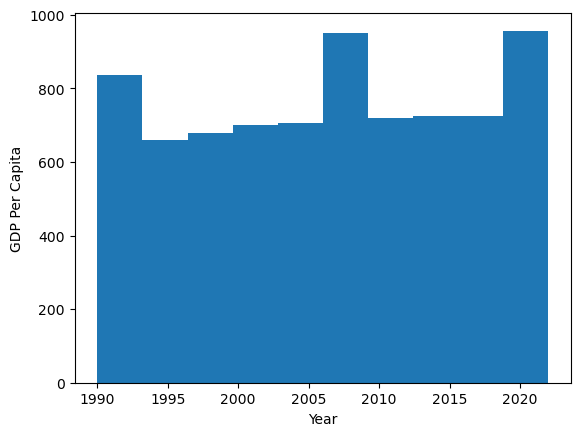

In [39]:
plt.hist(gdp_df.Year)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.show()

#8.cont'd: Violin Plot

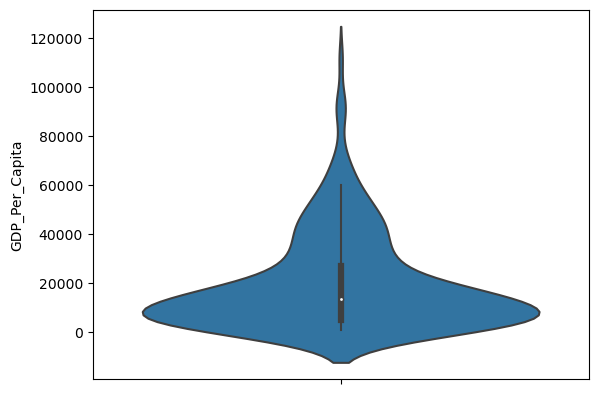

In [40]:
gdp_2020 = gdp_df[gdp_df["Year"]==2020]

sns.violinplot(y=gdp_2020["GDP_Per_Capita"])
plt.show()

^^ Going back to finish graphs on 3rd push ^^

#9.

What was the median GDP per capita value in 2020?

In [46]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()
median_gdp_2020

13357.997573370474

median is 13357.997573370474

#10.

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

In [43]:
#subsetting data to 1990,2000,2010 and 2020

gdp_decades = gdp_df.loc[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

In [44]:
gdp_decades = gdp_df.loc[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


barplot for #10 

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

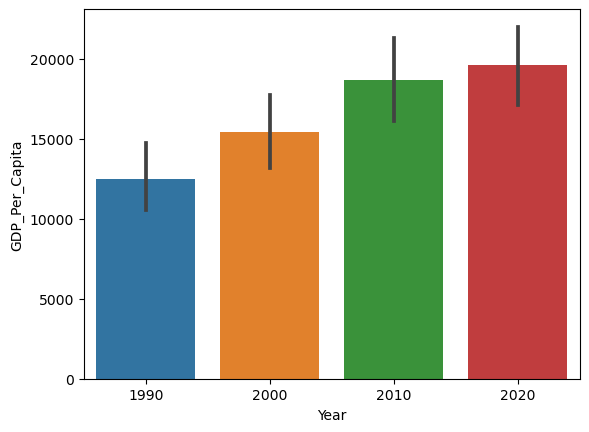

In [47]:
sns.barplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')

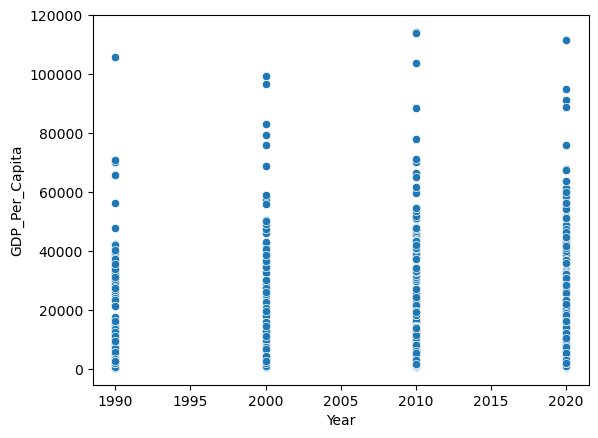

In [48]:
#scatterplot for 10

sns.scatterplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')
plt.show()

#11. Which country was the first to have a GDP per capita greater than $100,000?

In [52]:
gdp_over_100 = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
gdp_sorted_values = gdp_over_100.sort_values('Year')
numberone_country = gdp_sorted_values.iloc[0]
numberone_country

Country           United Arab Emirates
Year                              1990
GDP_Per_Capita           105893.626059
Name: 7302, dtype: object

#12 Which country had the highest GDP per capita in 2020?


In [56]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
highest_gdp_2020 = gdp_2020['GDP_Per_Capita'].idxmax()
country_highest_2020 = gdp_2020.loc[highest_gdp_2020, 'Country']
country_highest_2020

'Luxembourg'

#Line plot trial for #12

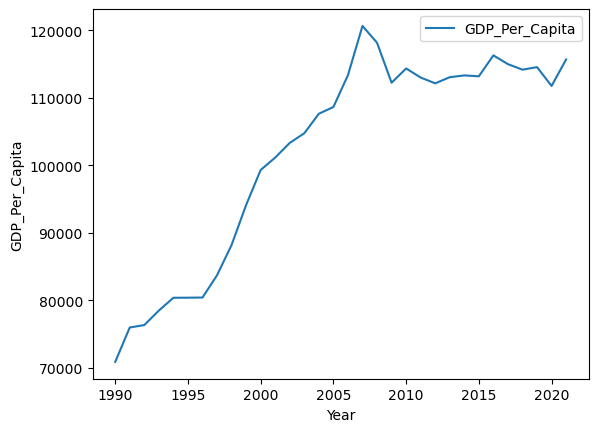

In [58]:
Luxembourg_graph = gdp_df[(gdp_df['Country'] == 'Luxembourg') & (gdp_df['Year'].between(1990,2021))]
Luxembourg_graph.plot(x = 'Year', y = 'GDP_Per_Capita', kind = 'line')
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()

#13. Which country had the lowest GDP per capita in 2020?

In [59]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
lowest_capita_2020 = gdp_2020['GDP_Per_Capita'].idxmin()
country_with_lowest = gdp_2020.loc[lowest_capita_2020, 'Country']
country_with_lowest

'Burundi'

#14 Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors



In [61]:
internet_df = pd.read_csv('../data/internet_use.csv')
internet_df

ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6


Unable to figure out #14. Not sure If I can answer the rest of the questions without answering #14